# <div align=center>STOCK PRICE ANALYSIS and FORECASTING </div>

In [1]:
"""
Importing numpy to perform numeric operations on data.
Numpy is fast and extensible ML library that performs fast 
calculations and operations in linear algebra.
"""
import numpy as np

"""
Pandas package providing fast, flexible, and expressive data 
structures designed to make working with “relational” or “labeled”
data both easy and intuitive.
"""
import pandas as pd

"""
Matplotlib is goto library for building plots using python.
It's is a pool of different types of plots used for data analysis.
"""
import matplotlib.pyplot as plt
"""
Seaborn is considered as superset of Matplotlib.It uses beautiful 
themes for decorating Matplotlib graphics. It serves in making graphs
of statical Time-Series data.
"""
import seaborn as sns

"""
Plots Interactive plots.
"""
import plotly.express as px
"""
pandas_datareader is popularly used for working with realtime stock 
price datasets. We'll use this to read stock data from Yahoo finance.
"""
from pandas_datareader.data import DataReader

"""
Python Datetime module supplies classes to work with date and time.
"""
from datetime import datetime

## <div align=center>Objective</div>
### <div align=center>Find answers to following queries.</div>
> 1. **What was the change in price of the stock over time?**
> 2. What was the moving average of the various stocks?
> 3. What was the daily return of the stock on average?
> 4. What was the correlation between different stocks'?
> 5. How much value do we put at risk by investing in a particular stock?
> 6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [3]:
tech_list = ['FB' ,'AAPL', 'AMZN', 'MSFT', 'GOOG']
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

# for loop to fetch yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [4]:
company_list = [FB, AAPL, AMZN, MSFT, GOOG]
company_name = ["Meta", "APPLE", "AMAZON", "MICROSOFT", "GOOGLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

High          Low         Open        Close     Volume  \
Date                                                                        
2021-11-22  3014.889893  2940.110107  3002.834961  2941.570068  1230400.0   
2021-11-23  2953.879883  2897.790039  2942.260010  2935.139893   906300.0   
2021-11-24  2940.000000  2903.979980  2927.000000  2934.350098   823200.0   
2021-11-26  2905.939941  2849.709961  2900.310059  2856.120117   849600.0   
2021-11-29  2937.239990  2885.969971  2885.969971  2922.280029  1313800.0   
2021-11-30  2932.570068  2841.320068  2909.004883  2849.040039  2079500.0   
2021-12-01  2929.982910  2830.000000  2884.250000  2832.360107  1423800.0   
2021-12-02  2893.500000  2819.639893  2836.479980  2875.530029  1062500.0   
2021-12-03  2904.260010  2823.000000  2889.909912  2850.409912  1333800.0   
2021-12-06  2887.030029  2812.939941  2871.479980  2875.929932  1109300.0   

              Adj Close company_name  
Date                                  
2021-11-22  2941.570068       GOOGLE  
2021-11-23  2935.139893       GOOGLE  
2021-11-24  2934.350098       GOOGLE  
2021-11-26  2856.120117       GOOGLE  
2021-11-29  2922.280029       GOOGLE  
2021-11-30  2849.040039       GOOGLE  
2021-12-01  2832.360107       GOOGLE  
2021-12-02  2875.530029       GOOGLE  
2021-12-03  2850.409912       GOOGLE  
2021-12-06  2875.929932       GOOGLE

In [5]:
FB.describe()

High         Low        Open       Close        Volume  \
count  504.000000  504.000000  504.000000  504.000000  5.040000e+02   
mean   276.712460  269.524504  273.100278  273.187996  2.050430e+07   
std     57.537460   57.222683   57.423805   57.317592  9.646421e+06   
min    148.179993  137.100006  139.750000  146.009995  6.046300e+06   
25%    232.972500  226.247498  229.930000  230.755005  1.420288e+07   
50%    274.835007  267.604996  270.985001  271.065002  1.820245e+07   
75%    329.577499  322.007500  326.215012  324.662506  2.450865e+07   
max    384.329987  378.809998  381.679993  382.179993  7.634390e+07   

        Adj Close  
count  504.000000  
mean   273.187996  
std     57.317592  
min    146.009995  
25%    230.755005  
50%    271.065002  
75%    324.662506  
max    382.179993

In [6]:
FB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-12-06 to 2021-12-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          504 non-null    float64
 1   Low           504 non-null    float64
 2   Open          504 non-null    float64
 3   Close         504 non-null    float64
 4   Volume        504 non-null    int64  
 5   Adj Close     504 non-null    float64
 6   company_name  504 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.5+ KB


# Q1:- What was the change in price of the stock overtime?

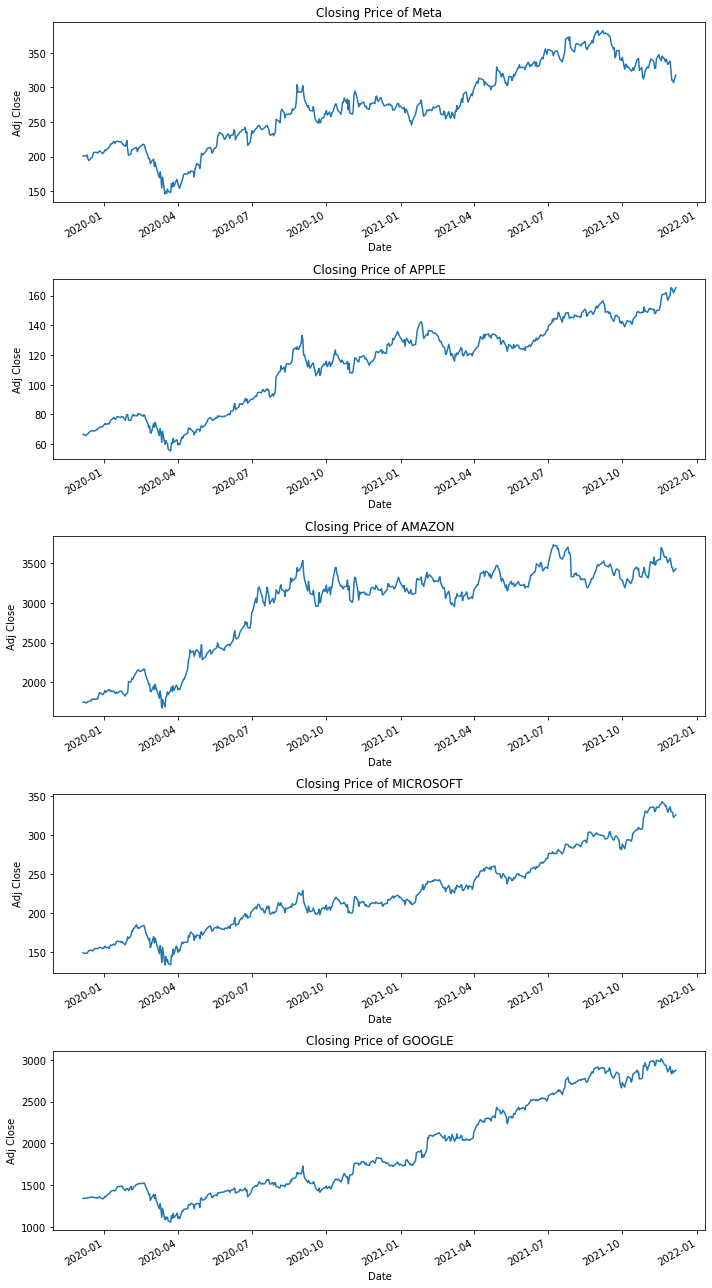

In [7]:
plt.figure(figsize=(10, 18))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(5, 1, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {company_name[i - 1]}")

plt.tight_layout()

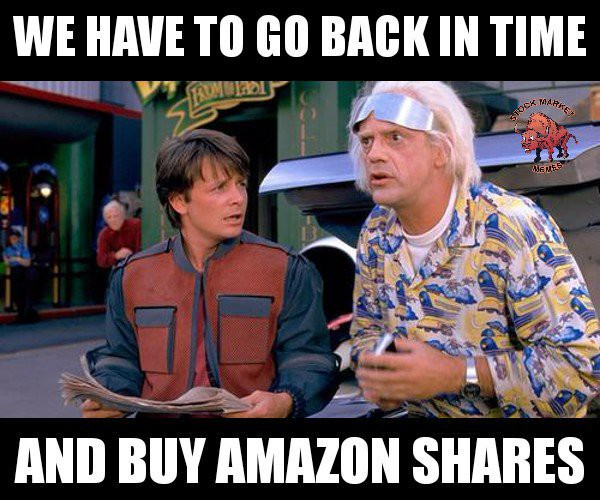

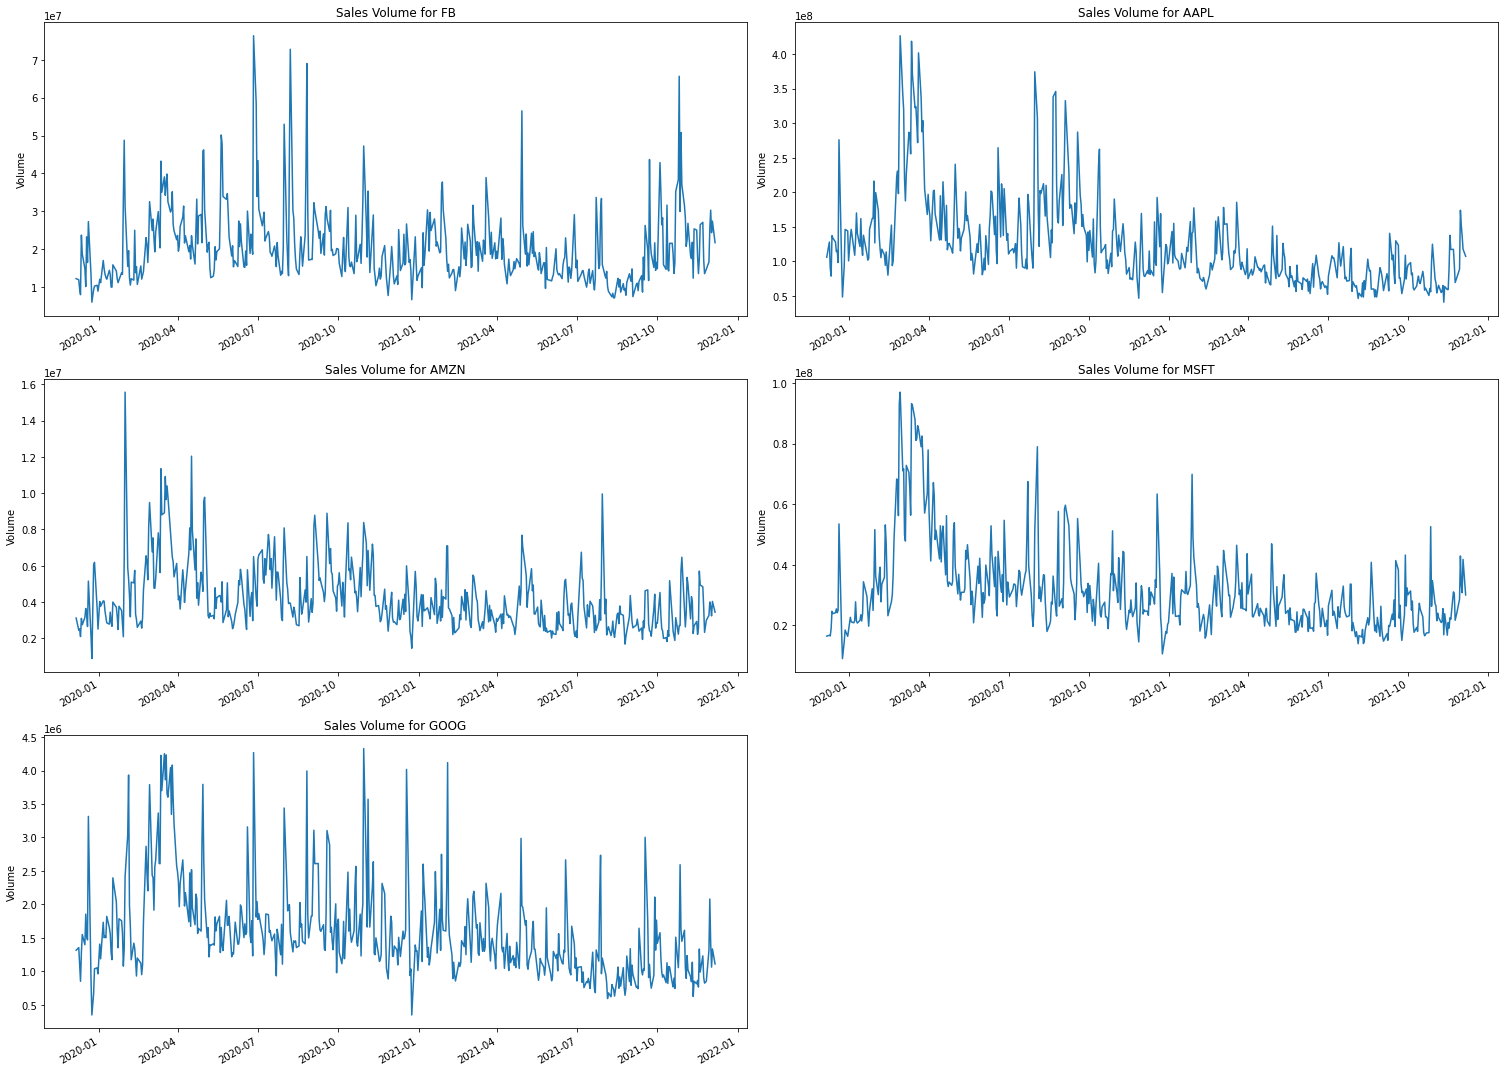

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(21, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# Q2:- What was the moving average of the various stocks?

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [10]:
def plot_trend(stock):
    fig = px.line(stock,x=stock.index, y=['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days'])
    fig.show()

for comp in company_list:
    plot_trend(comp)

# Q3:- What was the daily return of the stock on average?

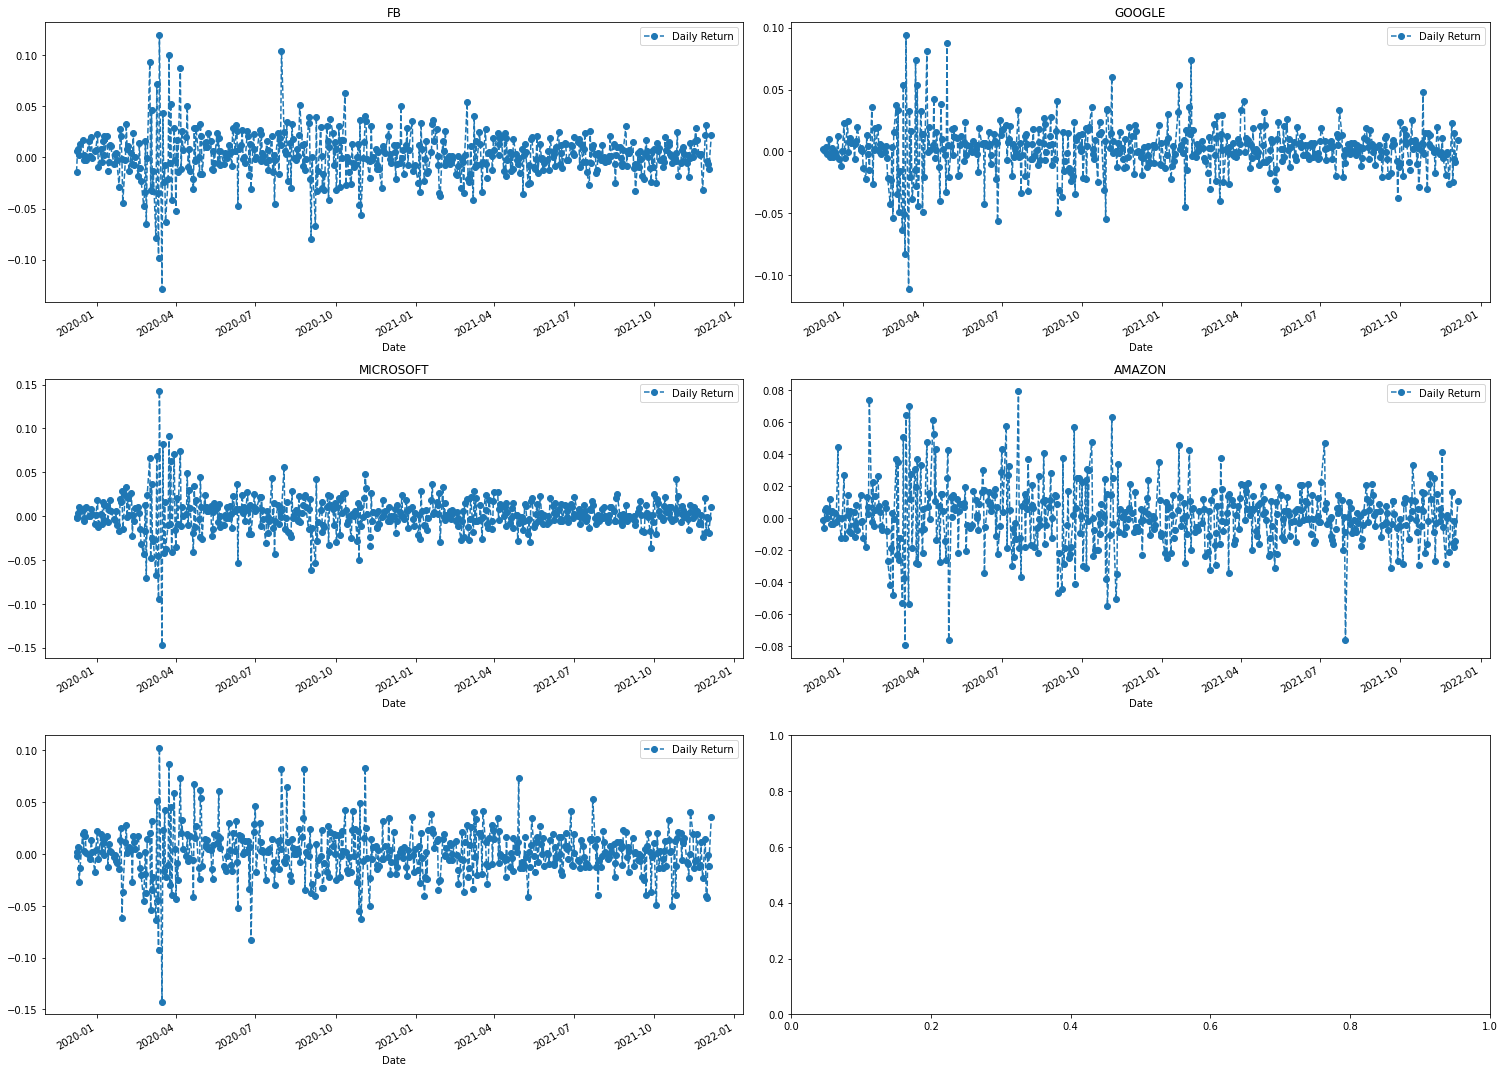

In [12]:
# Finding percentage change for each day.
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting daily return percentage
fig, axes =  plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(21)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

FB['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('FB')

fig.tight_layout()

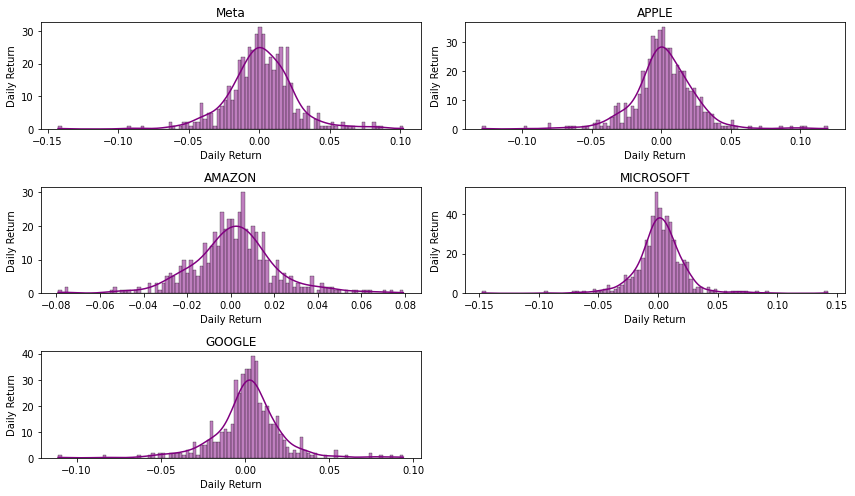

In [13]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.histplot(company['Daily Return'].dropna(), kde=True, bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [14]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols             FB       AAPL         AMZN        MSFT         GOOG
Date                                                                   
2019-12-06  201.050003  66.686928  1751.599976  148.911041  1340.619995
2019-12-09  201.339996  65.753288  1749.510010  148.528336  1343.560059
2019-12-10  200.869995  66.137596  1739.209961  148.302658  1344.660034
2019-12-11  202.259995  66.701714  1748.719971  148.861984  1345.020020
2019-12-12  196.750000  66.871674  1760.329956  150.373184  1350.270020

In [15]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols           FB      AAPL      AMZN      MSFT      GOOG
Date                                                        
2019-12-06       NaN       NaN       NaN       NaN       NaN
2019-12-09  0.001442 -0.014000 -0.001193 -0.002570  0.002193
2019-12-10 -0.002334  0.005845 -0.005887 -0.001519  0.000819
2019-12-11  0.006920  0.008529  0.005468  0.003772  0.000268
2019-12-12 -0.027242  0.002548  0.006639  0.010152  0.003903

# Q4:- What was the correlation between different stocks'?

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

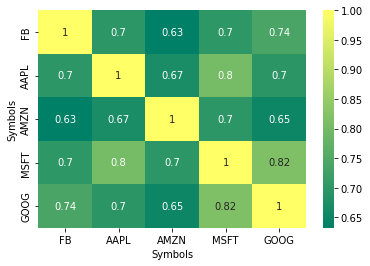

In [16]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

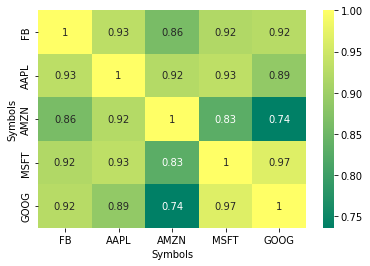

In [17]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# Q5:- How much value do we put at risk by investing in a particular stock?

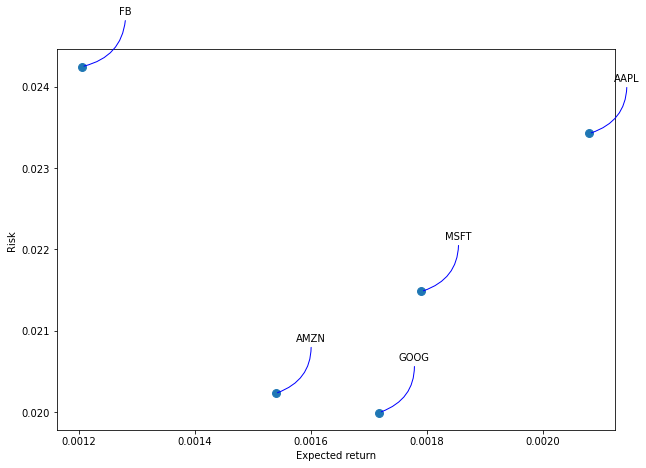

In [18]:
# Let's start by defining a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = tech_rets.dropna()
area = np.pi * 20


plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.4'))

# Q6:- Predicting the closing price stock price of APPLE inc

In [18]:
df = DataReader('FB', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

High         Low        Open       Close     Volume  \
Date                                                                    
2012-05-18   45.000000   38.000000   42.049999   38.230000  573576400   
2012-05-21   36.660000   33.000000   36.529999   34.029999  168192700   
2012-05-22   33.590000   30.940001   32.610001   31.000000  101786600   
2012-05-23   32.500000   31.360001   31.370001   32.000000   73600000   
2012-05-24   33.209999   31.770000   32.950001   33.029999   50237200   
...                ...         ...         ...         ...        ...   
2021-11-29  340.670013  335.309998  336.890015  338.029999   16650900   
2021-11-30  335.809998  323.429993  335.000000  324.459991   25390000   
2021-12-01  330.500000  310.290009  330.290009  310.600006   30329600   
2021-12-02  314.600006  307.200012  311.399994  310.390015   24396200   
2021-12-03  313.750000  299.500000  313.730011  306.839996   27448700   

             Adj Close  
Date                    
2012-05-18   38.230000  
2012-05-21   34.029999  
2012-05-22   31.000000  
2012-05-23   32.000000  
2012-05-24   33.029999  
...                ...  
2021-11-29  338.029999  
2021-11-30  324.459991  
2021-12-01  310.600006  
2021-12-02  310.390015  
2021-12-03  306.839996  

[2403 rows x 6 columns]

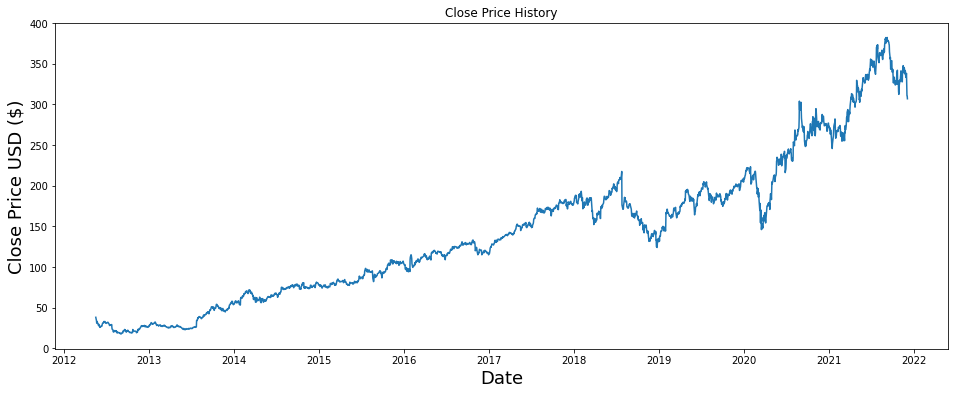

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2283

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05624914],
       [0.04472493],
       [0.03641103],
       ...,
       [0.80359449],
       [0.8030183 ],
       [0.79327755]])

In [22]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.05624914, 0.04472493, 0.03641103, 0.03915489, 0.04198107,
       0.03890795, 0.03048429, 0.02870079, 0.03256963, 0.02741117,
       0.0251612 , 0.02233503, 0.02491425, 0.02354232, 0.02570998,
       0.02546303, 0.02653313, 0.02617643, 0.02897517, 0.03369461,
       0.03753601, 0.03890795, 0.03805735, 0.03871588, 0.04203594,
       0.03931953, 0.04217314, 0.03978598, 0.03739882, 0.03668542,
       0.03577995, 0.03695981, 0.03770064, 0.03841405, 0.03962134,
       0.03770064, 0.03632871, 0.0358897 , 0.03564275, 0.02886542,
       0.0284264 , 0.03122514, 0.03092331, 0.03026479, 0.03023735,
       0.02941419, 0.03185622, 0.02502401, 0.01640829, 0.01487173,
       0.01092056, 0.00864316, 0.00633832, 0.00921937, 0.01149678,
       0.00820414, 0.00820414, 0.00899986, 0.01119495, 0.01061874])]
[0.007271229711778966]

[array([0.05624914, 0.04472493, 0.03641103, 0.03915489, 0.04198107,
       0.03890795, 0.03048429, 0.02870079, 0.03256963, 0.02741117,
       0.0251612 , 0.02233503, 0.0

(2223, 60, 1)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2021-12-05 09:28:16.815103: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-05 09:28:16.815192: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-05 09:28:27.860642: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-05 09:28:27.860743: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-05 09:28:27.860823: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nj): /proc/driver/nvidia/version does not exist
2021-12-05 09:28:27.861615: I tensorflow/core/platform/cpu_feature_guard.c

2223/2223 [==============================] - 57s 24ms/step - loss: 0.0010


In [24]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


26.9558632700065

/tmp/ipykernel_10385/772481817.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



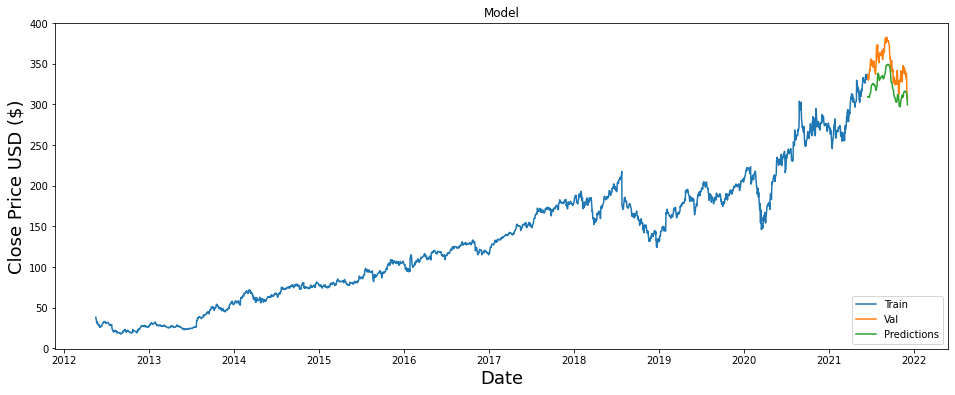

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

fig=px.line(train['Close'])
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
valid

Close  Predictions
Date                               
2021-06-16  331.079987   309.354126
2021-06-17  336.510010   309.185852
2021-06-18  329.660004   309.659027
2021-06-21  332.290009   308.950287
2021-06-22  339.029999   308.491608
...                ...          ...
2021-11-29  338.029999   313.816803
2021-11-30  324.459991   313.128082
2021-12-01  310.600006   310.318878
2021-12-02  310.390015   304.842957
2021-12-03  306.839996   299.502686

[120 rows x 2 columns]